In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.getcwd()

'/content'

In [4]:
os.chdir('/content/drive/MyDrive/Pds_Assignment-2')

In [5]:
os.getcwd()

'/content/drive/MyDrive/Pds_Assignment-2'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('raw_data/diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
np.random.seed(357)

In [10]:
sample_data = data.sample(n=25)

In [11]:
sample_mean = sample_data['Glucose'].mean()
sample_max = sample_data['Glucose'].max()

In [12]:
print('Sample Mean Glucose:', sample_mean)
print('Sample Max Glucose:', sample_max)

Sample Mean Glucose: 123.64
Sample Max Glucose: 187


In [13]:
population_mean = data['Glucose'].mean()
population_max = data['Glucose'].max()

In [14]:
print('Population Mean Glucose:', population_mean)
print('Population Max Glucose:', population_max)

Population Mean Glucose: 120.89453125
Population Max Glucose: 199


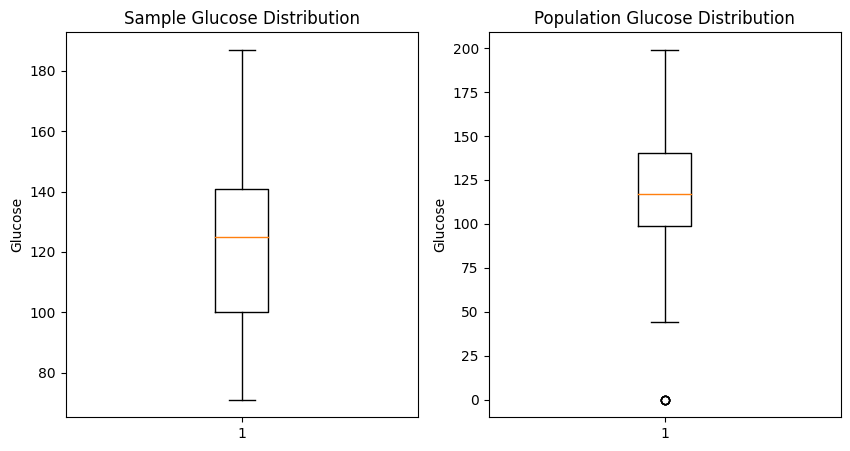

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(sample_data['Glucose'])
axs[0].set_title('Sample Glucose Distribution')
axs[0].set_ylabel('Glucose')
axs[1].boxplot(data['Glucose'])
axs[1].set_title('Population Glucose Distribution')
axs[1].set_ylabel('Glucose')
plt.savefig('results/graph_1.png')
plt.show()

In [16]:
sample_bmi_98 = np.percentile(sample_data['BMI'], 98)
population_bmi_98 = np.percentile(data['BMI'], 98)

In [17]:
print('Sample 98th Percentile BMI:', sample_bmi_98)
print('Population 98th Percentile BMI:' , population_bmi_98)

Sample 98th Percentile BMI: 46.72
Population 98th Percentile BMI: 47.52599999999996


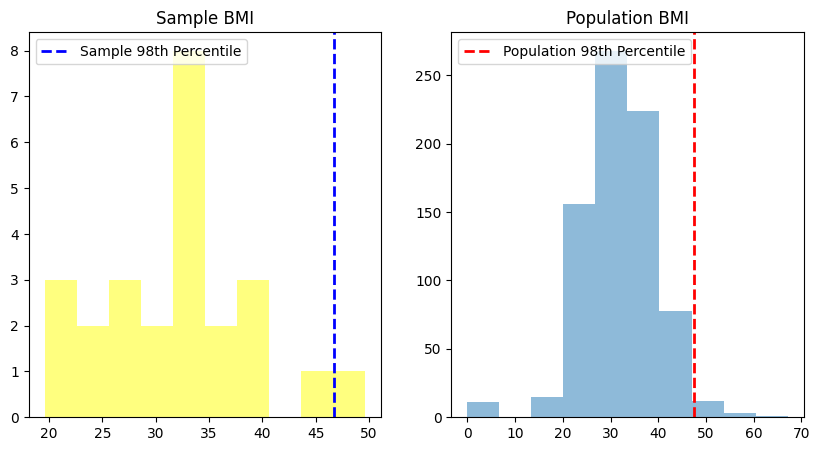

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Sample BMI')
plt.hist(sample_data['BMI'],color='yellow', bins=10, alpha=0.5)
plt.axvline(sample_bmi_98, color='blue', linestyle='dashed', linewidth=2, label='Sample 98th Percentile')
plt.legend()
plt.subplot(1,2,2)
plt.title('Population BMI')
plt.hist(data['BMI'], bins=10, alpha=0.5)
plt.axvline(population_bmi_98, color='red', linestyle='dashed', linewidth=2, label='Population 98th Percentile')
plt.savefig('results/graph_2.png')
plt.legend()
plt.show()


In [19]:
n_samples = 500
sample_means = np.zeros(n_samples)
sample_stds = np.zeros(n_samples)
sample_percentiles = np.zeros(n_samples)

In [20]:
def percentile(x):
  return np.percentile(bootstrap_sample['BloodPressure'], q=x)SS

In [21]:
y=int(input())
n_obs = len(data)
for i in range(n_samples):
    # Generate a bootstrap sample
    bootstrap_sample = data.sample(n=150, replace=True)
    
    # Calculate the mean, standard deviation, and percentile of BloodPressure for the sample
    sample_means[i] = bootstrap_sample['BloodPressure'].mean()
    sample_stds[i] = bootstrap_sample['BloodPressure'].std()
    sample_percentiles[i] = percentile(y)

# Calculate the statistics for the population
pop_mean = data['BloodPressure'].mean()
pop_std = data['BloodPressure'].std()
pop_percentile = percentile(y)

25


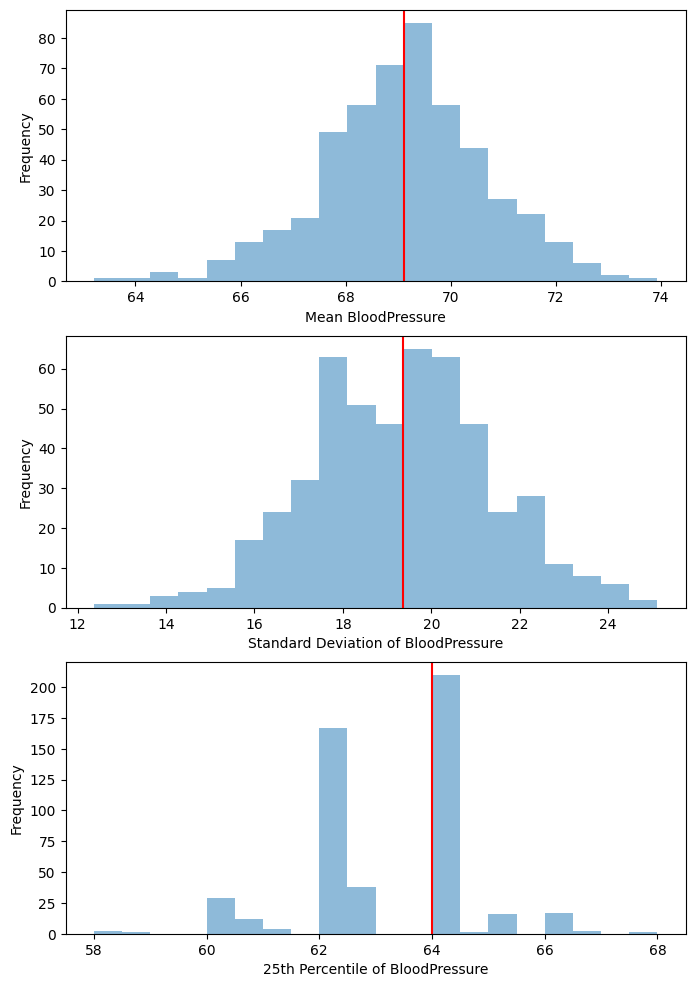

In [23]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
axes[0].hist(sample_means, bins=20, alpha=0.5)
axes[0].axvline(x=pop_mean, color='red')
----axes[0].set_xlabel('Mean BloodPressure')
axes[0].set_ylabel('Frequency')

axes[1].hist(sample_stds, bins=20, alpha=0.5)
axes[1].axvline(x=pop_std, color='red')
axes[1].set_xlabel('Standard Deviation of BloodPressure')
axes[1].set_ylabel('Frequency')

axes[2].hist(sample_percentiles, bins=20, alpha=0.5)
axes[2].axvline(x=pop_percentile, color='red')
axes[2].set_xlabel(f'{y}th Percentile of BloodPressure')
axes[2].set_ylabel('Frequency')

plt.savefig('results/graph_3.png')
plt.show()